[0.         0.21821789 0.3086067  0.37796447 0.37796447 0.
 0.21821789 0.21821789 0.3086067  0.37796447 0.         0.
 0.37796447 0.3086067  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


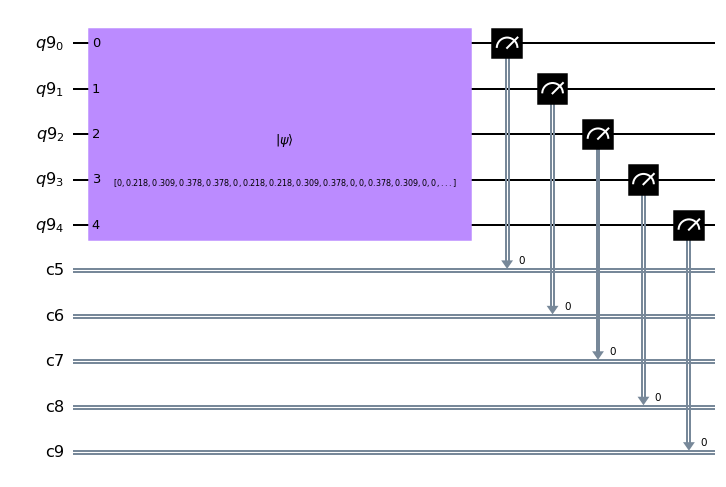

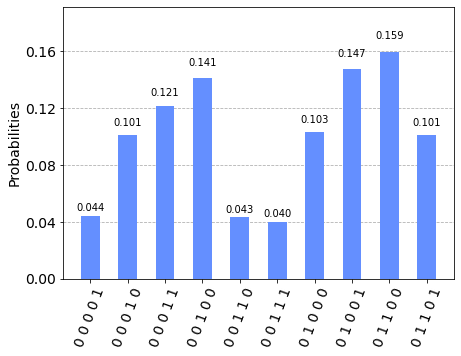

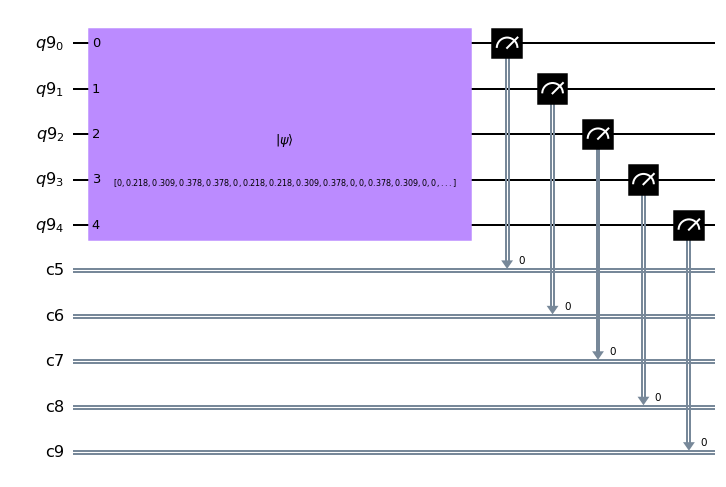

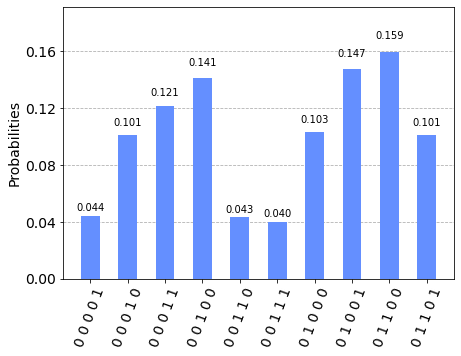

In [2]:
# Import qiskit and call it q for short so we can construct,simulate, and run quantum circuits!
import qiskit as q
# Import Numpy and call it np so we can do maths!
import numpy as np

# Import the python plotting module of matplotlib and call it plt so we can draw graphs!
import matplotlib.pyplot as plt
# Tell matplotlib that we are in an Ipython notebook
%matplotlib inline


DNAseq1="ACGTTACCGTAATGAA"
DNAseq2="TTACGACGTTACCGTA"

#amplitude encoding A=0 C=1 G=2 T=3


def DNA2Ampl(DNAseq):
    ampl=[]
    sum=0
    for i in range(len(DNAseq1)):
        if DNAseq1[i]=="A":
            ampl.append(0)
        elif DNAseq1[i]=="C":
            ampl.append(1)
            sum+=1
        elif DNAseq1[i]=="G":
            ampl.append(2)
            sum+=2
        else:
            ampl.append(3)
            sum+=3
            
    return ampl,sum
            
am1,sum1=DNA2Ampl(DNAseq1)


cqubit=np.array([1,0]) # this could be the control qubit
statevec=np.asarray(am1)/sum1

qstate=np.kron(cqubit,np.sqrt(statevec)) #normalisation

print(qstate)


qr=q.QuantumRegister(5)
cr_0=q.ClassicalRegister(1)
cr_1=q.ClassicalRegister(1)
cr_2=q.ClassicalRegister(1)
cr_3=q.ClassicalRegister(1)
cr_4=q.ClassicalRegister(1)
circ = q.QuantumCircuit(qr,cr_0,cr_1,cr_2,cr_3,cr_4)
circ.initialize(qstate,qr)

circ.measure(0,cr_0)
circ.measure(1,cr_1)
circ.measure(2,cr_2)
circ.measure(3,cr_3)
circ.measure(4,cr_4)

display(circ.draw(output="mpl"))


# Drawing the histogram

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(circ, backend, shots=1000)
result = job.result()
counts = result.get_counts(circ)

graph = q.visualization.plot_histogram(counts)

display(graph)



